<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-LM-data" data-toc-modified-id="Create-LM-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create LM data</a></span></li><li><span><a href="#Create-classifier-data" data-toc-modified-id="Create-classifier-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create classifier data</a></span></li><li><span><a href="#Save-data" data-toc-modified-id="Save-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Save data</a></span></li></ul></div>

This method allows us to build the LM from all reviews - labeled and unlabeled.

https://docs.fast.ai/tutorial.data.html

# Import libs and define global vars

In [1]:
import os
from fastai.text import * 

# Set the seeds
seedVal = 10
from numpy.random import seed
seed(seedVal)

path = './'

# Load and view data

In [2]:
# Set paths to CSV files
dataPath = os.path.join('.', 'datasets', 'imdb_movie_reviews')
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')
unlabeledTrainData = os.path.join(dataPath, 'unlabeledTrainData.tsv')
testData = os.path.join(dataPath, 'testData.tsv')

# Read CSV files into DFs
labDat = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)
unlabDat = pd.read_csv(unlabeledTrainData, sep = '\t', header = 0, quoting = 3)
testDat = pd.read_csv(testData, sep = '\t', header = 0, quoting = 3)

# Add columns
labDat['type'] = 'train'
unlabDat['type'] = 'unlabeled'
testDat['type'] = 'test'

unlabDat['sentiment'] = None
testDat['sentiment'] = None


# Sanity check
print('labDat.shape :', labDat.shape)
print('unlabDat.shape :', unlabDat.shape)
print('testDat.shape :', testDat.shape)

# Examine results
print("\n")
print('labDat.info() :', labDat.info())
print("\n")
print('unlabDat.info() :', unlabDat.info())
print("\n")
print('testDat.info() :', testDat.info())

labDat.shape : (25000, 4)
unlabDat.shape : (50000, 4)
testDat.shape : (25000, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
type         25000 non-null object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
labDat.info() : None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
id           50000 non-null object
review       50000 non-null object
type         50000 non-null object
sentiment    0 non-null object
dtypes: object(4)
memory usage: 1.5+ MB
unlabDat.info() : None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
id           25000 non-null object
review       25000 non-null object
type         25000 non-null object
sentiment    0 non-null object
dtypes: object(4)
memory usage: 781.3+ KB


---combinedDat = pd.concat(objs=[labDat, unlabDat, testDat], axis=0).reset_index(drop=True)
print(combinedDat.shape)
print("\n")
print(combinedDat.info())
Combine the DFs

In [3]:
combinedDat = pd.concat(objs=[labDat, unlabDat, testDat], axis=0, sort=False).reset_index(drop=True)
print(combinedDat.shape)
print("\n")
print(combinedDat.info())

(100000, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
id           100000 non-null object
sentiment    25000 non-null object
review       100000 non-null object
type         100000 non-null object
dtypes: object(4)
memory usage: 3.1+ MB
None


In [4]:
combinedDat.head()

,id,sentiment,review,type
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",train
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",train
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",train
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",train
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",train


# Prepare the data

## Create LM data

In [5]:
# Language model data
data_lm = (TextList.from_df(df = combinedDat.iloc[:164,:], cols = 'review')
           .random_split_by_pct(seed=seedVal)
           .label_for_lm()
           .databunch())

In [6]:
data_lm.show_batch()

idx,text
0,"xxbos "" i just saw this episode this xxunk , on a recently - added xxunk by one of our local xxunk xxunk , which now presents two xxunk each xxunk . \n\n xxmaj as the xxunk xxunk in the other , previous comment here , i agree this may not have been one of the best xxunk of the series , but i find it entertaining xxunk . \n\n"
1,"xxunk , has xxunk in her . xxmaj and he has made it his xxunk mission to see that she xxunk at becoming a pilot , for he was a xxunk of the battle in which xxmaj noriko 's father was killed . \n\n xxmaj other characters xxunk xxmaj xxunk - xxmaj xxunk , a xxmaj xxunk xxunk pilot xxunk to xxunk with the xxunk xxmaj noriko and xxmaj xxunk"
2,"she pick ? i have to xxunk 10 lines in order to xxunk to the first comment . xxmaj what am i going to say . xxmaj xxunk da da de de . xxmaj xxunk da da de de xxunk only up to 8 how do i get to 9 almost almost xxunk 9 now i need 10 - 1 , 2 , 3 , 4 , 5 , 6"
3,"xxunk ups . i liked the film . xxmaj its not the be all and end all but it was a nice way to xxunk off an xxunk of sitting on the xxunk watching movies . \n\n 7 out of 10 "" xxbos "" i loved the episode but seems to me there should have been some quick reference to the xxunk getting xxunk for xxunk being an xxunk after"
4,". xxmaj the audience is xxunk . \n\n xxmaj together with xxunk ` , this is definitely xxmaj xxunk 's most stupid movie . 2 stars out of 10 . "" xxbos "" \n\n xxmaj this movie is full of xxunk . xxmaj like "" xxmaj mad xxmaj xxunk xxup ii "" , "" xxmaj the xxunk one "" and many others . xxmaj the xxunk face xxunk a clear"


## Create classifier data

In [7]:
data_clas = (TextList.from_df(df = combinedDat[ combinedDat['type'] == 'train'].iloc[:164,:], cols='review', vocab=data_lm.vocab)
             .random_split_by_pct(valid_pct=0.1, seed=seedVal)
             .label_from_df(cols='sentiment')
             .databunch(bs=32))

In [8]:
data_clas.show_batch()

text,target
"xxbos "" xxmaj hello xxmaj mary xxmaj lou : xxmaj prom xxmaj night xxup ii starts at the xxmaj hamilton xxmaj high xxmaj school prom of xxunk where xxmaj mary xxmaj lou xxmaj xxunk ( xxmaj xxunk xxmaj xxunk ) is xxunk on her xxunk xxmaj bill xxmaj xxunk ( xxmaj xxunk xxmaj xxunk ) with xxmaj bud xxmaj xxunk ( xxmaj robert xxmaj xxunk ) . xxmaj bill finds",0
"xxbos "" xxmaj zombie xxmaj review xxunk 3 \n\n * * xxmaj spoilers * * \n\n xxmaj few films are actually "" so bad they 're good "" , and xxmaj zombi 3 is not just bad , it 's xxunk , xxunk bad in so many ways that a whole new xxunk may be needed just to xxunk them all \n\n xxmaj more than that , it 's a",0
"xxbos "" xxmaj xxunk by the xxunk ( every gay video these days has a xxunk on the cover ; this is not necessarily to be xxunk as a good xxunk ) i xxunk xxup ben xxup and xxup arthur without knowing a thing about it . xxmaj this is my second ( and i xxunk you it will be my last ) purchase of a xxup culture q xxup",0
"xxbos "" xxmaj really , the use of xxunk nature documentary of swarming bats xxunk by xxup the xxup bat xxup people is some of the most effective ever . xxmaj there are shots of xxunk bats xxunk from the xxunk of caves , swarming bats xxunk out of caves or xxunk about near the xxunk of caves . xxmaj that alone is enough to be xxunk : xxmaj imagine",0
"xxbos "" i 'll xxunk with the usual xxunk to a certain xxunk xxunk known for his xxunk xxmaj new xxmaj xxunk xxunk , because quite xxunk , to xxunk xxunk with xxunk xxunk xxmaj xxunk xxmaj xxunk , is just an xxunk to any such director . i will also avoid xxunk the xxunk - on satire ` xxmaj xxunk xxmaj xxunk ' in the same xxunk as this",0


In [9]:
# How can we view the results of the preprocessing?

# Look at record number three...  The FloatItem at the end is the label
#data_clas.train_ds[2]

#data_clas.train_ds.__class__
# fastai.data_block.LabelList
# https://github.com/fastai/fastai/blob/master/fastai/data_block.py

print(data_clas.train_ds.x[1])
print(data_clas.train_ds.y[1])

#len(data_clas.train_ds.x)
#len(data_clas.valid_ds.x)
#print(len(data_clas.train_ds.x) + len(data_clas.valid_ds.x))
#print(len(labDat))

xxbos " " xxmaj the xxmaj classic xxmaj war of the xxmaj xxunk " by xxmaj xxunk xxmaj xxunk is a very entertaining film that xxunk goes to great effort and xxunk to xxunk xxunk xxup xxunk xxup xxunk xxmaj xxunk ' classic book . xxmaj mr. xxmaj xxunk xxunk in doing so . i , and those who watched his film with me , xxunk the fact that it was not the xxunk , xxunk xxmaj hollywood xxunk that comes out every year , xxunk the xxmaj xxunk version with xxmaj tom xxmaj xxunk that had only the xxunk xxunk to the book . xxmaj xxunk , everyone looks for different things in a movie . xxmaj those who xxunk themselves as xxunk " xxunk " look only to xxunk everything they can . xxmaj others rate a movie on more important xxunk , like being xxunk , which is why most people never agree with the " xxunk " . xxmaj we enjoyed the effort xxmaj mr. xxmaj xxunk put into being xxunk to xxup xxunk xxmaj xxunk ' classic novel , and we found it to be very entertaining . xxmaj this made it xxunk to xxunk what the 

## Save data

In [10]:
data_lm.save()
data_clas.save()

In [11]:
data_lm = TextLMDataBunch.load(path)
data_clas = TextClasDataBunch.load(path, bs=32)

# Create and fine tune language model

We can use the data_lm object we created earlier to fine-tune a pretrained language model. fast.ai has an English model available that we can download. We can create a learner object that will directly create a model, download the pretrained weights and be ready for fine-tuning.

In [12]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,4.077188,3.489840,0.314762


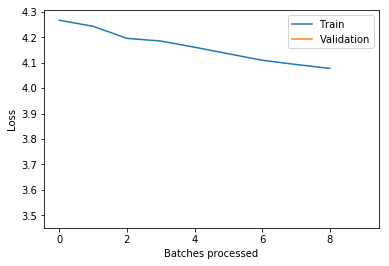

In [13]:
learn.recorder.plot_losses()

---
Next, fine tune the model:

In [14]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,3.830185,3.455946,0.334199


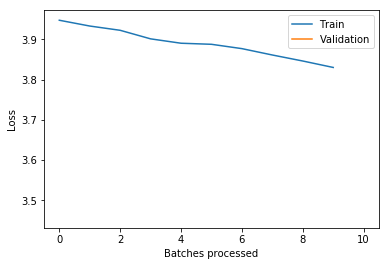

In [15]:
learn.recorder.plot_losses()

---
Save the encoder for classification in the next section.

In [16]:
learn.save_encoder('ft_enc')

# Build and train the classifier

In [17]:
learn = text_classifier_learner(data_clas)
learn.load_encoder('ft_enc')

In [18]:
data_clas.show_batch()

text,target
"xxbos "" xxmaj hello xxmaj mary xxmaj lou : xxmaj prom xxmaj night xxup ii starts at the xxmaj hamilton xxmaj high xxmaj school prom of xxunk where xxmaj mary xxmaj lou xxmaj xxunk ( xxmaj xxunk xxmaj xxunk ) is xxunk on her xxunk xxmaj bill xxmaj xxunk ( xxmaj xxunk xxmaj xxunk ) with xxmaj bud xxmaj xxunk ( xxmaj robert xxmaj xxunk ) . xxmaj bill finds",0
"xxbos "" xxmaj zombie xxmaj review xxunk 3 \n\n * * xxmaj spoilers * * \n\n xxmaj few films are actually "" so bad they 're good "" , and xxmaj zombi 3 is not just bad , it 's xxunk , xxunk bad in so many ways that a whole new xxunk may be needed just to xxunk them all \n\n xxmaj more than that , it 's a",0
"xxbos "" xxmaj xxunk by the xxunk ( every gay video these days has a xxunk on the cover ; this is not necessarily to be xxunk as a good xxunk ) i xxunk xxup ben xxup and xxup arthur without knowing a thing about it . xxmaj this is my second ( and i xxunk you it will be my last ) purchase of a xxup culture q xxup",0
"xxbos "" xxmaj really , the use of xxunk nature documentary of swarming bats xxunk by xxup the xxup bat xxup people is some of the most effective ever . xxmaj there are shots of xxunk bats xxunk from the xxunk of caves , swarming bats xxunk out of caves or xxunk about near the xxunk of caves . xxmaj that alone is enough to be xxunk : xxmaj imagine",0
"xxbos "" i 'll xxunk with the usual xxunk to a certain xxunk xxunk known for his xxunk xxmaj new xxmaj xxunk xxunk , because quite xxunk , to xxunk xxunk with xxunk xxunk xxmaj xxunk xxmaj xxunk , is just an xxunk to any such director . i will also avoid xxunk the xxunk - on satire ` xxmaj xxunk xxmaj xxunk ' in the same xxunk as this",0


In [19]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.727230,0.682437,0.750000


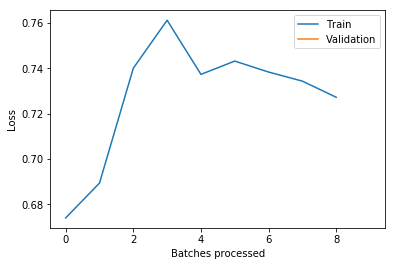

In [20]:
learn.recorder.plot_losses()

In [21]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy
1,0.648593,0.678771,0.562500


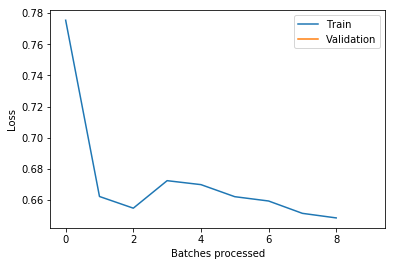

In [22]:
learn.recorder.plot_losses()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy
1,0.706929,0.656623,0.625000


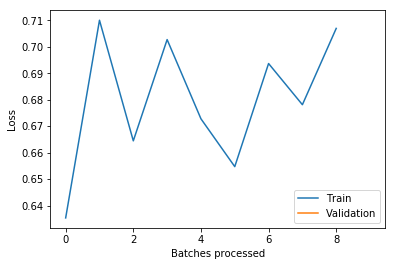

In [24]:
learn.recorder.plot_losses()

---

In [25]:
learn.save('imdb_train_clas')

In [26]:
learn.show_results(5)

text,target,prediction
"xxbos "" xxmaj hello xxmaj mary xxmaj lou : xxmaj prom xxmaj night xxup ii starts at the xxmaj hamilton xxmaj high xxmaj school prom of xxunk where xxmaj mary xxmaj lou xxmaj xxunk ( xxmaj xxunk xxmaj xxunk ) is xxunk on her xxunk xxmaj bill xxmaj xxunk ( xxmaj xxunk xxmaj xxunk ) with xxmaj bud xxmaj xxunk ( xxmaj robert xxmaj xxunk ) . xxmaj bill finds",0,1
"xxbos "" xxmaj zombie xxmaj review xxunk 3 \n\n * * xxmaj spoilers * * \n\n xxmaj few films are actually "" so bad they 're good "" , and xxmaj zombi 3 is not just bad , it 's xxunk , xxunk bad in so many ways that a whole new xxunk may be needed just to xxunk them all \n\n xxmaj more than that , it 's a",0,1
"xxbos "" xxmaj xxunk by the xxunk ( every gay video these days has a xxunk on the cover ; this is not necessarily to be xxunk as a good xxunk ) i xxunk xxup ben xxup and xxup arthur without knowing a thing about it . xxmaj this is my second ( and i xxunk you it will be my last ) purchase of a xxup culture q xxup",0,1
"xxbos "" xxmaj really , the use of xxunk nature documentary of swarming bats xxunk by xxup the xxup bat xxup people is some of the most effective ever . xxmaj there are shots of xxunk bats xxunk from the xxunk of caves , swarming bats xxunk out of caves or xxunk about near the xxunk of caves . xxmaj that alone is enough to be xxunk : xxmaj imagine",0,1
"xxbos "" i 'll xxunk with the usual xxunk to a certain xxunk xxunk known for his xxunk xxmaj new xxmaj xxunk xxunk , because quite xxunk , to xxunk xxunk with xxunk xxunk xxmaj xxunk xxmaj xxunk , is just an xxunk to any such director . i will also avoid xxunk the xxunk - on satire ` xxmaj xxunk xxmaj xxunk ' in the same xxunk as this",0,1


# Predictions

In [39]:
item = list(combinedDat[ combinedDat['type'] == 'test']['review'])[1]
item

'"This movie is a disaster within a disaster film. It is full of great action scenes, which are only meaningful if you throw away all sense of reality. Let\'s see, word to the wise, lava burns you; steam burns you. You can\'t stand next to lava. Diverting a minor lava flow is difficult, let alone a significant one. Scares me to think that some might actually believe what they saw in this movie.<br /><br />Even worse is the significant amount of talent that went into making this film. I mean the acting is actually very good. The effects are above average. Hard to believe somebody read the scripts for this and allowed all this talent to be wasted. I guess my suggestion would be that if this movie is about to start on TV ... look away! It is like a train wreck: it is so awful that once you know what is coming, you just have to watch. Look away and spend your time on more meaningful content."'

In [40]:
learn.predict(item)

(Category 1, tensor(1), tensor([0.4393, 0.5607]))

---------------------------------------------------------------------

In [29]:
data_lm.__class__
method_list = [func for func in dir(data_lm) if callable(getattr(data_lm, func))]
method_list

['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init_ds',
 'add_tfm',
 'create',
 'dl',
 'export',
 'from_csv',
 'from_df',
 'from_folder',
 'from_ids',
 'from_tokens',
 'load',
 'load_empty',
 'loss_func',
 'one_batch',
 'one_item',
 'sanity_check',
 'save',
 'show_batch']